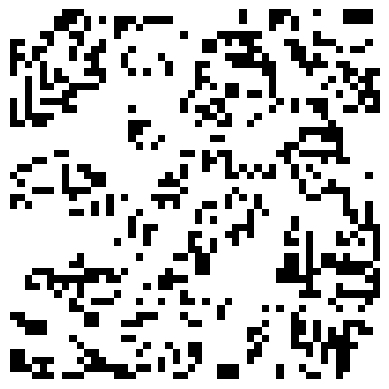

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the size of the grid
grid_size = (50, 50)  # Adjust for a larger or smaller grid

# Initialize the grid with random 0s and 1s
def initialize_grid(size):
    return np.random.choice([0, 1], size=size)

# Compute the next state of the grid based on Conway's rules
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # Count live neighbors
            total = sum(
                grid[i + x, j + y]
                for x in [-1, 0, 1]
                for y in [-1, 0, 1]
                if (x != 0 or y != 0) and (0 <= i + x < grid.shape[0]) and (0 <= j + y < grid.shape[1])
            )

            # Apply Conway's rules
            if grid[i, j] == 1:
                if total < 2 or total > 3:
                    new_grid[i, j] = 0  # Dies
            else:
                if total == 3:
                    new_grid[i, j] = 1  # Becomes alive

    return new_grid

# Display the grid using matplotlib
fig, ax = plt.subplots()

# Initialize the grid
grid = initialize_grid(grid_size)
im = ax.imshow(grid, cmap="binary", interpolation="nearest")
plt.axis("off")

# Function to update the plot
def animate(frame):
    global grid
    grid = update_grid(grid)
    im.set_data(grid)
    return [im]

# Create the animation
ani = FuncAnimation(fig, animate, frames=200, interval=100, blit=True)

# To display in a Jupyter notebook
plt.show()
